<a href="https://colab.research.google.com/github/priya212000/Food-spoilage-detection/blob/main/Image_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install bing-image-downloader

In [2]:
import bing_image_downloader
from bing_image_downloader import downloader

In [3]:
!mkdir images1

In [4]:

downloader.download('rotten vegetables', limit=1000,  output_dir='images1', adult_filter_off=True, force_replace=False, timeout=60)



[!!]Indexing page: 1

[%] Indexed 150 Images on Page 1.


[%] Downloading Image #1 from http://i.huffpost.com/gen/3179636/images/o-ROTTEN-VEGETABLES-facebook.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://img.huffingtonpost.com/asset/5c1ba19e240000090758b23f.jpeg?cache=frvpvzb1f7&amp;ops=1910_1000
[Error]Invalid image, not saving https://img.huffingtonpost.com/asset/5c1ba19e240000090758b23f.jpeg?cache=frvpvzb1f7&amp;ops=1910_1000

[!] Issue getting: https://img.huffingtonpost.com/asset/5c1ba19e240000090758b23f.jpeg?cache=frvpvzb1f7&amp;ops=1910_1000
[!] Error:: No active exception to reraise
[%] Downloading Image #2 from https://cmkt-image-prd.global.ssl.fastly.net/0.1.0/ps/78388/1360/902/m1/fpnw/wm1/dsc00025-.jpg?1393219660&amp;s=fcdc960ee5891dbfd75b8ec58faadb74
[!] Issue getting: https://cmkt-image-prd.global.ssl.fastly.net/0.1.0/ps/78388/1360/902/m1/fpnw/wm1/dsc00025-.jpg?1393219660&amp;s=fcdc960ee5891dbfd75b8ec58faadb74
[!] Error:: HTTP Error 403: Forbidden
[%] 

In [5]:
downloader.download('fresh vegetables', limit=1000,  output_dir='images2', adult_filter_off=True, force_replace=False, timeout=200)



[!!]Indexing page: 1

[%] Indexed 150 Images on Page 1.


[%] Downloading Image #1 from https://simplefamilypreparedness.com/wp-content/uploads/2012/10/DSCF0031.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://healthflexhhs.com/wp-content/uploads/2014/11/fresh-vegetables-greens.jpg
[Error]Invalid image, not saving http://healthflexhhs.com/wp-content/uploads/2014/11/fresh-vegetables-greens.jpg

[!] Issue getting: http://healthflexhhs.com/wp-content/uploads/2014/11/fresh-vegetables-greens.jpg
[!] Error:: No active exception to reraise
[%] Downloading Image #2 from http://3.bp.blogspot.com/-3Bbwpqb5dlg/UmWSwRV6V4I/AAAAAAAAAWY/YxsvCwUIPmQ/s1600/fresh-fruits-vegetables-2419.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://news.maryland.gov/dhcd/wp-content/uploads/sites/16/2015/02/fresh-food-initiative-2.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://tullochwines.files.wordpress.com/2015/08/1433684899zustt-fresh-vegetables-zf.jpg
[%] File Do

In [ ]:
!git clone https://github.com/ultralytics/flickr_scraper



Cloning into 'flickr_scraper'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 91 (delta 53), reused 40 (delta 16), pack-reused 0
Unpacking objects: 100% (91/91), done.


In [ ]:
cd flickr_scraper

/content/flickr_scraper


In [ ]:
!pip install -U -r requirements.txt

     |████████████████████████████████| 61kB 3.0MB/s 


In [ ]:
!python3 flickr_scraper.py --search 'honeybees on flowers' --n 10 --download

Traceback (most recent call last):
  File "flickr_scraper.py", line 68, in <module>
    download=opt.download)  # download images
  File "flickr_scraper.py", line 33, in get_urls
    for i, photo in enumerate(photos):
  File "/usr/local/lib/python3.6/dist-packages/flickrapi/core.py", line 688, in data_walker
    rsp = method(page=page, **params)
  File "/usr/local/lib/python3.6/dist-packages/flickrapi/call_builder.py", line 38, in __call__
    return self.flickrapi_object.do_flickr_call(self.method_name, **kwargs)
  File "/usr/local/lib/python3.6/dist-packages/flickrapi/core.py", line 337, in do_flickr_call
    **params)
  File "/usr/local/lib/python3.6/dist-packages/flickrapi/core.py", line 407, in _wrap_in_parser
    return parser(self, data)
  File "/usr/local/lib/python3.6/dist-packages/flickrapi/core.py", line 297, in parse_etree
    raise FlickrError(six.u('Error: %(code)s: %(msg)s') % err.attrib, code=code)
flickrapi.exceptions.FlickrError: Error: 100: Invalid API Key (Key has i

In [8]:
import numpy as np
from skimage.transform import resize
from skimage.io import imread
import matplotlib.pyplot as plt
import os

target = []
images = []   # In matrix format
flat_data = []  # In vector format

DATADIR = '/content/images1'
CATEGORIES = ['fresh vegetables','rotten vegetables']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  path = os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resized = resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

target = np.array(target)
images = np.array(images)
flat_data = np.array(flat_data)

In [49]:
images= np.array(images).reshape(2000,150,150,3)
images.shape
images

array([[[[0.99607843, 0.99607843, 0.99607843],
         [0.99411765, 0.99607843, 0.99607843],
         [0.96470588, 0.97843137, 0.99019608],
         ...,
         [0.27568627, 0.33647059, 0.33550327],
         [0.25006536, 0.29908497, 0.2863268 ],
         [0.27257516, 0.32060131, 0.35100654]],

        [[0.99607843, 0.99607843, 0.99607843],
         [0.99411765, 0.99607843, 0.99607843],
         [0.9627451 , 0.9774902 , 0.99019608],
         ...,
         [0.21537255, 0.28596078, 0.29458824],
         [0.2265098 , 0.28431373, 0.28133333],
         [0.27639216, 0.33215686, 0.34298039]],

        [[0.99607843, 0.99607843, 0.99607843],
         [0.99215686, 0.9951634 , 0.99607843],
         [0.95882353, 0.97464052, 0.98732026],
         ...,
         [0.34666667, 0.42405229, 0.46222222],
         [0.21581699, 0.28915033, 0.27464052],
         [0.32614379, 0.39856209, 0.41699346]],

        ...,

        [[0.13620915, 0.11071895, 0.05372549],
         [0.12130719, 0.10379085, 0.04705882]

In [18]:
# Creating a dataframe
import pandas as pd
df = pd.DataFrame(flat_data)
df['Target'] = target
a=df[0:67499]
a.shape

(2000, 67501)

In [19]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,67461,67462,67463,67464,67465,67466,67467,67468,67469,67470,67471,67472,67473,67474,67475,67476,67477,67478,67479,67480,67481,67482,67483,67484,67485,67486,67487,67488,67489,67490,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.996078,0.996078,0.996078,0.994118,0.996078,0.996078,0.964706,0.978431,0.990196,0.856863,0.892157,0.922536,0.845124,0.869621,0.909830,0.939216,0.956863,0.976471,0.982353,0.990196,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,...,0.211765,0.184314,0.072549,0.208837,0.183346,0.071582,0.204889,0.179399,0.071556,0.230431,0.199059,0.085307,0.257072,0.234536,0.087373,0.318797,0.294301,0.137333,0.315791,0.286353,0.135294,0.279399,0.246065,0.119556,0.219556,0.197987,0.080340,0.211712,0.188183,0.079373,0.204889,0.181359,0.078405,0.198065,0.175529,0.070614,0.193150,0.169621,0.066693,0
1,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,...,0.772314,0.595843,0.435059,0.761203,0.584732,0.423948,0.764412,0.587941,0.427157,0.745634,0.569163,0.408379,0.733333,0.556863,0.396078,0.741118,0.564647,0.403863,0.748902,0.572431,0.411647,0.769163,0.577124,0.420261,0.768510,0.576353,0.419490,0.777105,0.584967,0.431373,0.736484,0.564588,0.423529,0.735235,0.568510,0.427451,0.718935,0.553477,0.412418,0
2,0.750730,0.793867,0.869281,0.752843,0.795980,0.873758,0.765817,0.809205,0.884717,0.774915,0.818301,0.892562,0.759477,0.806536,0.877124,0.759505,0.806564,0.877124,0.757137,0.804196,0.874521,0.763399,0.806536,0.877124,0.754586,0.798183,0.872039,0.750627,0.797854,0.872196,0.764020,0.814471,0.888980,0.777660,0.828641,0.900000,0.775163,0.826144,0.900000,0.778431,...,0.523203,0.555447,0.633606,0.633214,0.661318,0.737671,0.525824,0.552000,0.622588,0.620915,0.651281,0.729712,0.500710,0.526538,0.591100,0.576307,0.607680,0.678366,0.522497,0.542758,0.609425,0.665699,0.696447,0.778800,0.595405,0.626778,0.705863,0.656431,0.691725,0.774078,0.635218,0.668497,0.749597,0.670536,0.713118,0.802105,0.593976,0.627281,0.708368,0
3,0.547059,0.288235,0.188235,0.523529,0.270588,0.174510,0.488784,0.256340,0.159190,0.444078,0.244601,0.176680,0.178614,0.098928,0.079137,0.098039,0.024418,0.018536,0.147765,0.021569,0.006954,0.271294,0.062562,0.007843,0.374693,0.097150,0.006771,0.537621,0.176654,0.012837,0.597333,0.209804,0.009804,0.635294,0.252052,0.023529,0.658824,0.260784,0.033333,0.650980,...,0.625307,0.634222,0.685908,0.637621,0.638693,0.699660,0.573124,0.539059,0.556392,0.349542,0.303712,0.203425,0.492366,0.518928,0.402405,0.664183,0.653647,0.669359,0.374092,0.331660,0.368915,0.156863,0.157046,0.165778,0.551869,0.561673,0.587163,0.655608,0.647765,0.674327,0.652758,0.642065,0.679320,0.561673,0.556680,0.598745,0.629229,0.627268,0.660601,0
4,0.182447,0.366797,0.011843,0.162477,0.341176,0.015686,0.105043,0.239893,0.011765,0.101046,0.229253,0.015686,0.187158,0.324450,0.019608,0.188889,0.333908,0.019529,0.090876,0.173830,0.027373,0.160157,0.238588,0.019537,0.164971,0.228157,0.011765,0.023477,0.035242,0.003895,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007843,0.020418,0.003922,0.020627,...,0.785542,0.808431,0.757451,0.583625,0.611007,0.598431,0.181721,0.181956,0.186035,0.137568,0.106065,0.066875,0.432519,0.314431,0.232075,0.553412,0.384776,0.258831,0.604601,0.424131,0.290876,0.640026,0.463618,0.334222,0.675529,0.514745,0.398118,0.582405,0.471083,0.400260,0.097255,0.118301,0.172207,0.011765,0.035294,0.096392,0.011765,0.035294,0.090196,0
...,...,...,...,...,...,...,...,...,...,...,...,.

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, target)

In [47]:
from tensorflow.keras import utils as np_utils
from keras.utils import to_categorical
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [48]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [51]:
X_train.shape

(1500, 150, 150, 3)

In [52]:
y_train_one_hot.shape

(1500, 2)

In [ ]:
print(y_train_one_hot)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [67]:
model = Sequential()

In [68]:
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(150,150,3)))


In [33]:
model.add(Conv2D(1500, (3, 3), padding="same", activation="relu", input_shape=(1500,67500)))
model.add(MaxPooling2D(pool_size=(2, 2)))


In [69]:


model.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))



In [70]:

model.add(Conv2D(128, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))


In [71]:
model.add(Flatten())


In [72]:
model.add(Dense(1000, activation='relu'))


In [73]:
model.add(Dropout(0.5))


In [74]:
model.add(Dense(500, activation='relu'))


In [75]:
model.add(Dropout(0.5))


In [76]:
model.add(Dense(250, activation='relu'))


In [77]:
model.add(Dense(10, activation='softmax'))

In [79]:
model = Sequential()
# The first two layers with 32 filters of window size 3x3
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(150, 150, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))

In [80]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [81]:
model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 150, 150, 32)      896       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 148, 148, 32)      9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 74, 74, 64)        18496     
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 36, 36, 64)       

In [84]:
model.fit(X_train, y_train_one_hot, epochs=10,  validation_split=0.2 )

Epoch 1/10
38/38 [==============================] - 2s 60ms/step - loss: 0.6931 - accuracy: 0.4967 - val_loss: 0.6931 - val_accuracy: 0.5067
Epoch 2/10
38/38 [==============================] - 2s 56ms/step - loss: 0.6931 - accuracy: 0.4975 - val_loss: 0.6931 - val_accuracy: 0.5067
Epoch 3/10
38/38 [==============================] - 2s 56ms/step - loss: 0.6931 - accuracy: 0.4975 - val_loss: 0.6931 - val_accuracy: 0.5067
Epoch 4/10
38/38 [==============================] - 2s 56ms/step - loss: 0.6931 - accuracy: 0.4950 - val_loss: 0.6931 - val_accuracy: 0.5067
Epoch 5/10
38/38 [==============================] - 2s 56ms/step - loss: 0.6931 - accuracy: 0.4967 - val_loss: 0.6931 - val_accuracy: 0.5067
Epoch 6/10
38/38 [==============================] - 2s 56ms/step - loss: 0.6931 - accuracy: 0.4967 - val_loss: 0.6931 - val_accuracy: 0.5067
Epoch 7/10
38/38 [==============================] - 2s 57ms/step - loss: 0.6931 - accuracy: 0.4967 - val_loss: 0.6931 - val_accuracy: 0.5067
Epoch 8/10
38

In [ ]:
from google.colab import files # Use to load data on Google Colab
uploaded = files.upload() # Use to load data on Google Colab
new_image = plt.imread("fresh.jpg") #Read in the image (3, 14, 20)

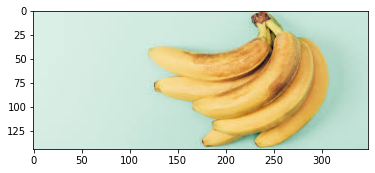

In [ ]:

img = plt.imshow(new_image)

array([[[0.85490196, 0.9372549 , 0.90196078],
        [0.85098039, 0.93333333, 0.89803922],
        [0.85098039, 0.93333333, 0.89803922],
        ...,
        [0.78431373, 0.90196078, 0.85882353],
        [0.78431373, 0.90196078, 0.85882353],
        [0.78431373, 0.90196078, 0.85882353]],

       [[0.85490196, 0.9372549 , 0.90196078],
        [0.85098039, 0.93333333, 0.89803922],
        [0.85098039, 0.93333333, 0.89803922],
        ...,
        [0.78431373, 0.90196078, 0.85882353],
        [0.78431373, 0.90196078, 0.85882353],
        [0.78431373, 0.90196078, 0.85882353]],

       [[0.85490196, 0.9372549 , 0.90196078],
        [0.85098039, 0.93333333, 0.89803922],
        [0.85098039, 0.93333333, 0.89803922],
        ...,
        [0.78431373, 0.90196078, 0.85882353],
        [0.78431373, 0.90196078, 0.85882353],
        [0.78431373, 0.90196078, 0.85882353]],

       ...,

       [[0.83529412, 0.92156863, 0.88235294],
        [0.83137255, 0.91819853, 0.87898284],
        [0.82745098, 0

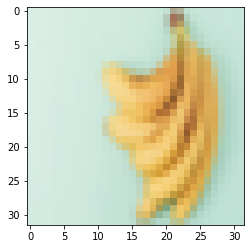

In [ ]:

from skimage.transform import resize
resized_image = resize(new_image, (32,32,3))
img = plt.imshow(resized_image)
resized_image

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras_preprocessing import image

In [ ]:
model = Sequential()
a= resized_image.transpose(2,0,1).reshape(3,-1)
a=np.array(a)

In [ ]:
predictions = model.predict(np.array( [resized_image] ))
predictions

array([[[[0.85490197, 0.9372549 , 0.9019608 ],
         [0.8509804 , 0.93333334, 0.8980392 ],
         [0.8509804 , 0.93333334, 0.8980392 ],
         ...,
         [0.78431374, 0.9019608 , 0.85882354],
         [0.78431374, 0.9019608 , 0.85882354],
         [0.78431374, 0.9019608 , 0.85882354]],

        [[0.85490197, 0.9372549 , 0.9019608 ],
         [0.8509804 , 0.93333334, 0.8980392 ],
         [0.8509804 , 0.93333334, 0.8980392 ],
         ...,
         [0.78431374, 0.9019608 , 0.85882354],
         [0.78431374, 0.9019608 , 0.85882354],
         [0.78431374, 0.9019608 , 0.85882354]],

        [[0.85490197, 0.9372549 , 0.9019608 ],
         [0.8509804 , 0.93333334, 0.8980392 ],
         [0.8509804 , 0.93333334, 0.8980392 ],
         ...,
         [0.78431374, 0.9019608 , 0.85882354],
         [0.78431374, 0.9019608 , 0.85882354],
         [0.78431374, 0.9019608 , 0.85882354]],

        ...,

        [[0.8352941 , 0.92156863, 0.88235295],
         [0.83137256, 0.9181985 , 0.87898284]

In [ ]:
list_index = [0,1]
x = predictions
for i in range(2):
  for j in range(2):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp
#Show the sorted labels in order from highest probability to lowest
print(list_index)

ValueError: ignored

In [ ]:
i=0
for i in range(2):
  print(CATEGORIES[list_index[i]], ':', round(predictions[0][list_index[i]] * 100, 2), '%')

fresh banana : 85.49 %
fresh apple : 85.1 %


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


Epoch 1/10
157/157 [==============================] - 76s 485ms/step - loss: 3.1568 - accuracy: 0.1471 - val_loss: 2.1309 - val_accuracy: 0.2129
Epoch 2/10
157/157 [==============================] - 75s 478ms/step - loss: 1.9770 - accuracy: 0.2390 - val_loss: 1.8472 - val_accuracy: 0.2888
Epoch 3/10
157/157 [==============================] - 79s 505ms/step - loss: 1.8168 - accuracy: 0.3006 - val_loss: 1.6969 - val_accuracy: 0.3676
Epoch 4/10
157/157 [==============================] - 75s 478ms/step - loss: 1.6586 - accuracy: 0.3793 - val_loss: 1.6018 - val_accuracy: 0.4222
Epoch 5/10
157/157 [==============================] - 75s 479ms/step - loss: 1.5472 - accuracy: 0.4309 - val_loss: 1.4446 - val_accuracy: 0.4756
Epoch 6/10
157/157 [==============================] - 75s 479ms/step - loss: 1.4607 - accuracy: 0.4692 - val_loss: 1.3884 - val_accuracy: 0.5086
Epoch 7/10
157/157 [==============================] - 75s 479ms/step - loss: 1.3894 - accuracy: 0.5012 - val_loss: 1.3718 - val_ac